In [86]:
import pandas as pd
import matplotlib.pyplot as plt

## NOTA
Si no me equivoco, la columna votación contiene solo la **votación preferencial**

In [87]:
Congress = pd.read_csv('CONG.csv')
Congress = Congress.set_index('Congresista', drop=True)

In [88]:
Congress.loc["Luna Gálvez José León", 'Votación']= 69538

In [89]:
Congress.groupby('Grupo')['Bancada'].count()

Grupo
Acción Popular                                 16
Alianza para el Progreso                       12
Alianza para el Progreso del Perú               3
Avanza País - Partido de Integración Social     7
Fuerza Popular                                 24
Juntos por el Perú                              5
Partido Democrático Somos Perú                  5
Partido Morado                                  3
Partido Politico Nacional Perú Libre           37
Podemos Perú                                    5
Renovación Popular                             13
Name: Bancada, dtype: int64

In [90]:
Congress = Congress.replace('AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL', 'AVANZA PAÍS')
Congress = Congress.replace('ACCION POPULAR', 'ACCIÓN POPULAR')

In [91]:
Congress.groupby('Región')['Votación'].sum().sum()

2351793

In [92]:
Congress = Congress.rename(columns={'Representatividad':'Rel_rep'})
Congress['Rep_abs'] = Congress['Votación']/2351793
#Something is wrong here, i can feel it
#Ok, I got it, this only counts the votes of representatives that got to congress, 
#not all of them, that would be a better metric

In [93]:
#Make the number of congres a column and making a df of region, bancada, rep abs y numcong
regions_numbers = Congress.groupby('Región')['Rep_abs'].count().sort_values()
pre_total_rep = Congress[['Región', 'Grupo', 'Rep_abs', 'Votación']].merge(regions_numbers, on='Región', how='left')


## Sub-representación en regiones

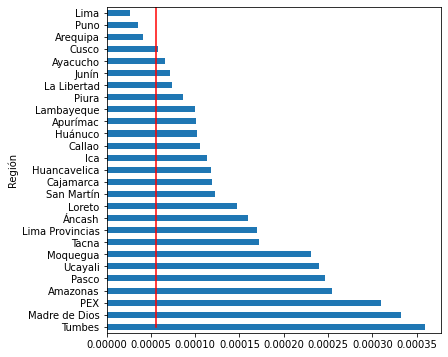

In [94]:
#Gets rep divided by number of cong
pre_total_rep['total_rep'] = pre_total_rep['Rep_abs_x']/pre_total_rep['Rep_abs_y']
rep_vs = pre_total_rep.groupby('Región')['total_rep'].sum().sort_values()**-1/2351793
rep_vs.plot(kind='barh', figsize=(6, 6))
#Plot desired representativity
x = 130/2351793
plt.plot([x, x],[0, 30], c='r')

In [95]:
!pip install geopandas
import geopandas as gpd

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<AxesSubplot:>

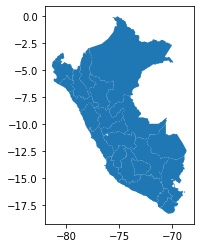

In [96]:
geometries = gpd.read_file('https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson')
geometries['geometry'].plot()

In [97]:
reg_rep = rep_vs.rename({'Áncash':'Ancash'}).sort_index().drop(['Lima Provincias', 'PEX']).reset_index()
geo_rep = reg_rep.merge(geometries[["NOMBDEP", 'geometry']],left_index=True, right_index=True).drop('NOMBDEP', axis=1)

In [102]:
geo_rep = gpd.GeoDataFrame(geo_rep)

<AxesSubplot:>

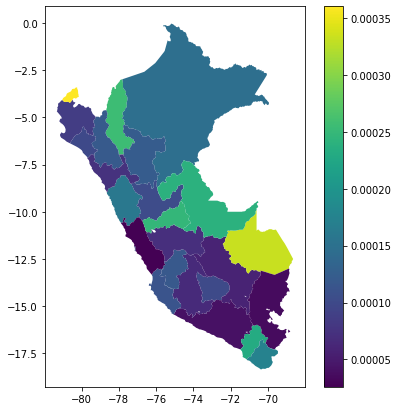

In [108]:
geo_rep.plot(column='total_rep', legend=True, figsize=(7, 7))

In [ ]:
(((rep_vs-x)**2).sum())**.5*2351793

1576.2651515784817

## Representatividad absoluta distribuida media por bancada
Representatividad absoluta distribuida = (Votación)/(Población_Total*Número_de_escaños).
En este cociente, se verán beneficiadas las bancadas que ganaron escaños en distritos electorales sobre-representados. Debería ser una buena medida de representación si los escaños están bien distribuidos.

<AxesSubplot:ylabel='Grupo'>

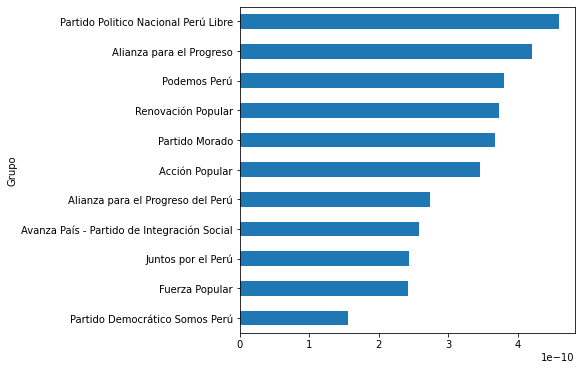

In [11]:
pre_total_rep['rep_abs_dist'] = pre_total_rep['total_rep']/2351793
rep_vs_bancada = pre_total_rep.groupby('Grupo')['rep_abs_dist'].median().sort_values()
rep_vs_bancada.plot(kind='barh', figsize=(6, 6))

## Media de votos por partido
Creo que acá solo cuentan el voto preferencial, así que tengan eso en cuenta

<AxesSubplot:ylabel='Grupo'>

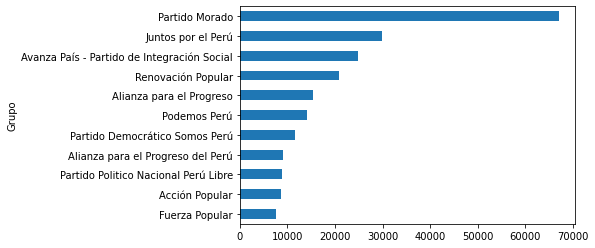

In [12]:
pre_total_rep.groupby('Grupo')['Votación'].median().sort_values().plot(kind='barh')

## Total de votos por partido
Creo que acá solo cuentan el voto preferencial, así que tengan eso en cuenta

<AxesSubplot:ylabel='Grupo'>

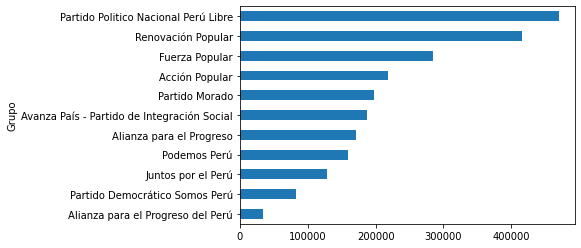

In [17]:
pre_total_rep.groupby('Grupo')['Votación'].sum().sort_values().plot(kind='barh')

## Distribución de la representación absoluta distribuida

<AxesSubplot:>

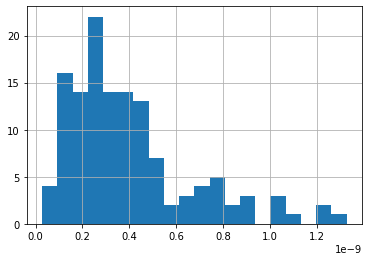

In [13]:
pre_total_rep['rep_abs_dist'].hist(bins=20)

## Representatividad interna media por partido
(Votos)/(número de escaños) \
Esta es una medida por congresista, se perjudican los partidos que ganaron escaños en zonas subrepresentadas, creo. xd

<AxesSubplot:ylabel='Grupo'>

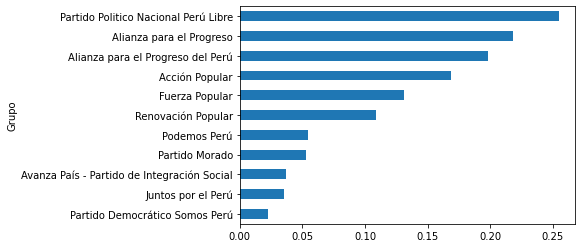

In [20]:
reg_voters = pre_total_rep.groupby('Región')['Votación'].sum()
temp_df = pre_total_rep.rename(columns={'Rep_abs_x':'Rep_abs'}).drop('Rep_abs_y', axis=1)\
             .merge(reg_voters, on='Región', suffixes=('_unit', '_regional'))\
             [['Región', 'Grupo', 'Votación_unit', 'Votación_regional']]
temp_df['rep_intern'] = temp_df['Votación_unit']/temp_df['Votación_regional']
temp_df.groupby('Grupo')['rep_intern'].median().sort_values().plot(kind='barh')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=496b7f65-72e8-4f99-acc9-201d5fae973f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>